<a href="https://colab.research.google.com/github/vijjus/ST-summer-2024/blob/main/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import dlib
import cv2
import imutils
import matplotlib.pyplot as plt

In [18]:
!nvidia-smi

Thu Apr 11 03:56:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0              41W / 300W |   6150MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Facial recognition - use a model to detect and identify a face.

In [4]:
image = cv2.imread("/content/family.jpeg")

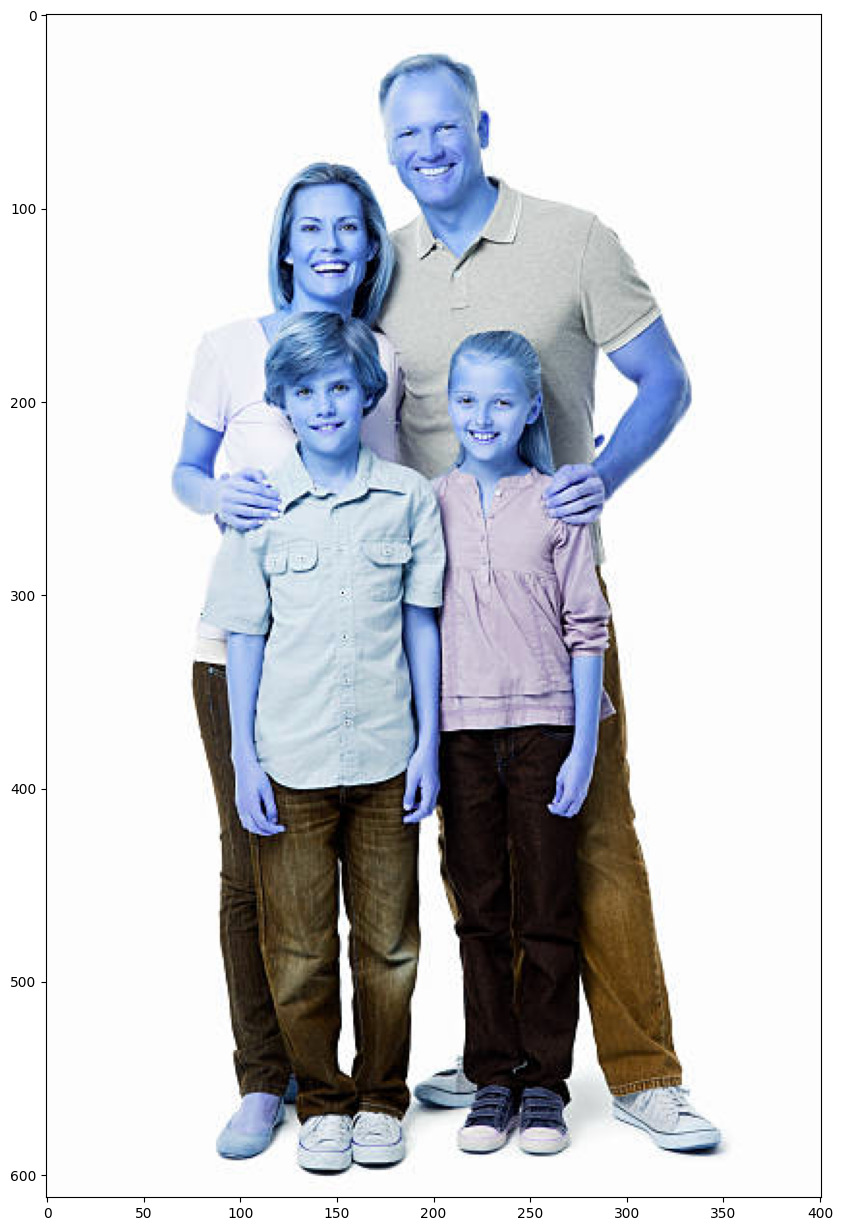

In [5]:
plt.figure(figsize=(10,20))
plt.imshow(image)

In [6]:
image = imutils.resize(image, width=600)

In [7]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [9]:
detector = dlib.get_frontal_face_detector()

In [10]:
rects = detector(rgb, 4)

In [11]:
def convert_and_trim_bb(image, rect):
	# extract the starting and ending (x, y)-coordinates of the
	# bounding box
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()
	# ensure the bounding box coordinates fall within the spatial
	# dimensions of the image
	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])
	# compute the width and height of the bounding box
	w = endX - startX
	h = endY - startY
	# return our bounding box coordinates
	return (startX, startY, w, h)

In [12]:
# convert the resulting dlib rectangle objects to bounding boxes,
# then ensure the bounding boxes are all within the bounds of the
# input image
boxes = [convert_and_trim_bb(image, r) for r in rects]

In [13]:
# the boxes are the X, Y (top left, width & height)
boxes

[(311, 286, 58, 58),
 (181, 143, 69, 70),
 (266, 74, 58, 58),
 (183, 273, 57, 58),
 (314, 818, 9, 10)]

In [14]:
# loop over the bounding boxes
for (x, y, w, h) in boxes:
	# draw the bounding box on our image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

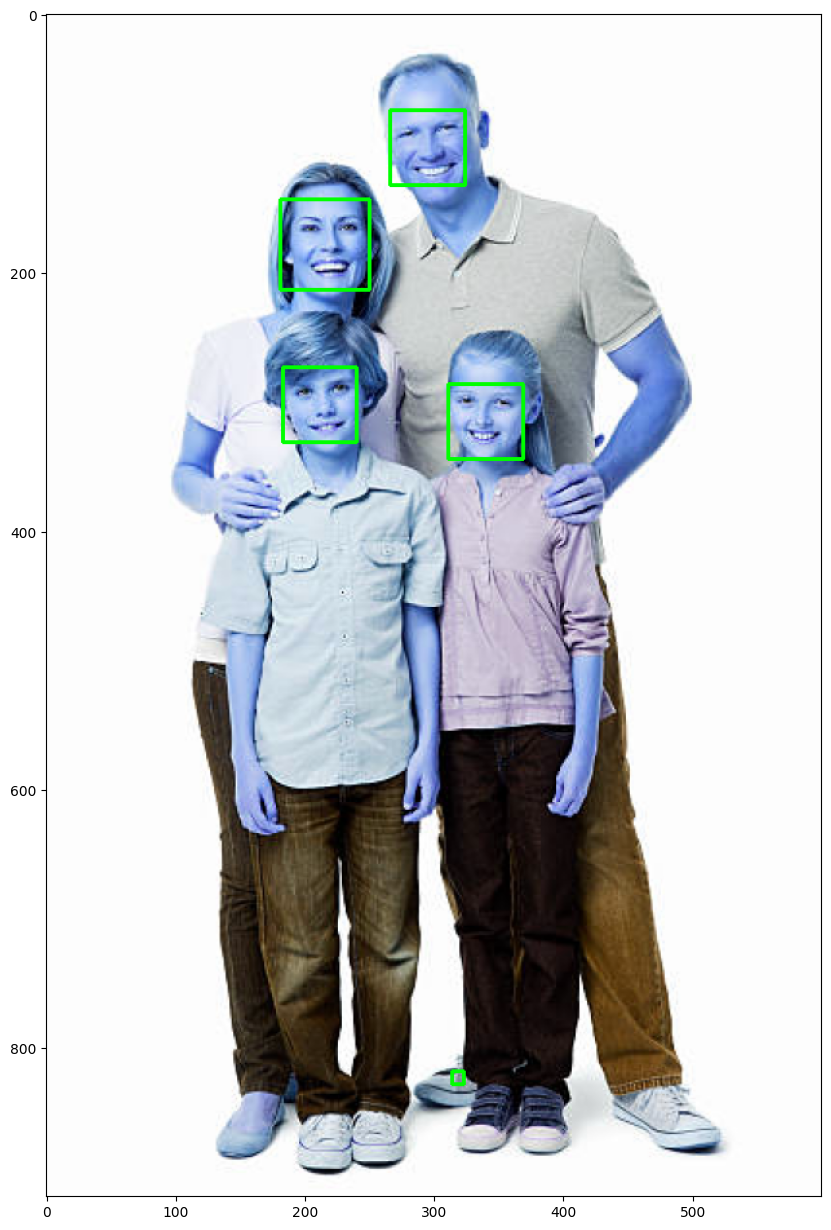

In [15]:
plt.figure(figsize=(10,20))
plt.imshow(image, cmap="gray")

In [16]:
detector = dlib.cnn_face_detection_model_v1("/content/mmod_human_face_detector.dat")

In [19]:
results = detector(rgb)

In [20]:
# convert the resulting dlib rectangle objects to bounding boxes,
# then ensure the bounding boxes are all within the bounds of the
# input image
boxes = [convert_and_trim_bb(image, r.rect) for r in results]

In [21]:
# loop over the bounding boxes
for (x, y, w, h) in boxes:
	# draw the bounding box on our image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

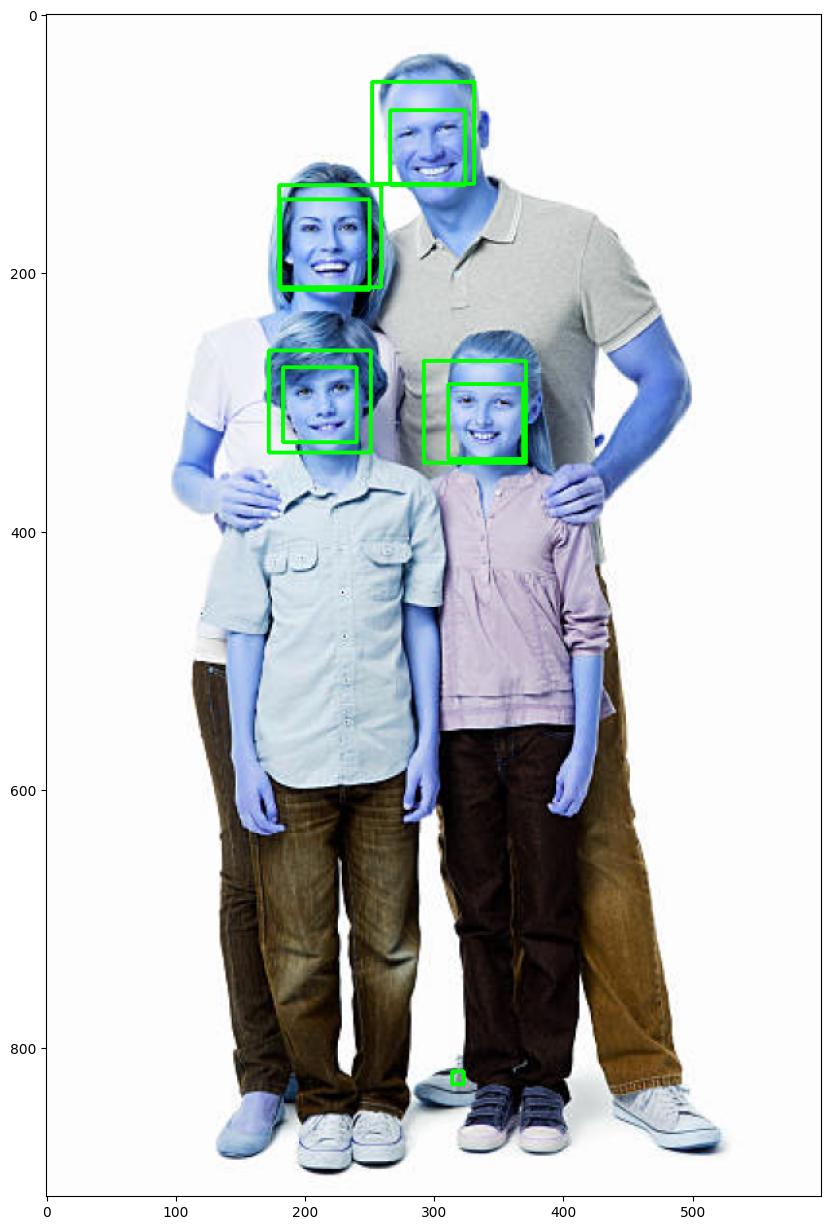

In [22]:
plt.figure(figsize=(10,20))
plt.imshow(image, cmap="gray")